# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 

In [2]:
try:
  data = pd.read_csv('/datasets/insurance.csv')
except:
  data =  pd.read_csv(r'D:\data_set\insurance.csv')

In [4]:
print(data.info())
data = data.drop_duplicates().reset_index()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,index,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,0,1,41.0,49600.0,1,0
1,1,0,46.0,38000.0,1,1
2,2,0,29.0,21000.0,0,0
3,3,0,21.0,41700.0,2,0
4,4,1,28.0,26100.0,0,0
...,...,...,...,...,...,...
4842,4995,0,28.0,35700.0,2,0
4843,4996,0,34.0,52400.0,1,0
4844,4997,0,20.0,33900.0,2,0
4845,4998,1,22.0,32700.0,3,0


Пропусков нет,дубликаты удалены 

In [5]:
data['Страховые выплаты'].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.

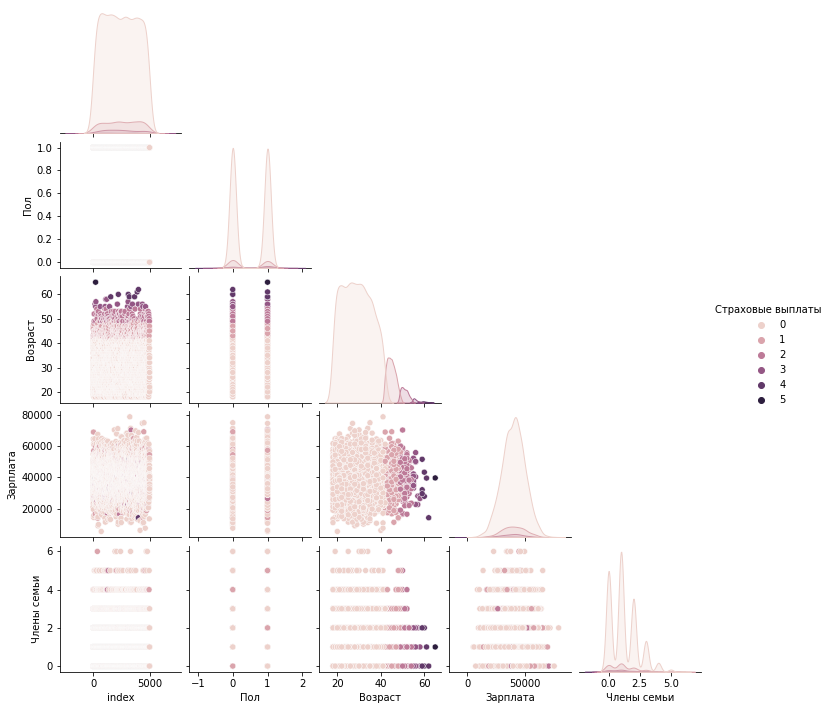

In [6]:
sns.pairplot(data,size=2,hue='Страховые выплаты',height = 1,corner=True)
plt.show()

<AxesSubplot:>

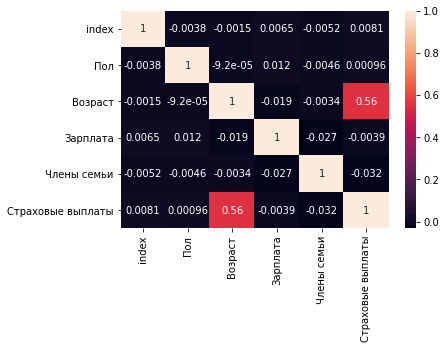

In [7]:
sns.heatmap(data.corr(method = 'spearman'), annot = True)

**Вывод:**
* Пропусков нет 
* Дубликаты удалены 
* мультиколлинеарности нет
* Есть значимая корреляция между возрастом и выплатами, думаю главное объяснение этого в том, чем дольше живет человек, тем большее окно для несчастных случаев. На языке ролевых игр - большая частота бросков кубиков на критическое повреждение, не говоря про здоровье и другие факторы связанные с возрастом 

## Умножение матриц

Докажем, что умножение данных на матрицу шифрования не окажет искажающие влияние на модель.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:**

Умножим матрицу целевого на обратную ей: 
$$
R = XP
$$

Тогда формула предсказаний будет иметь вид:
$$
a = Rw
$$
Обучение соответственно:
$$
w = (R^T R)^{-1} R^T y
$$
Теперь в эту формулу подставим 
$$
R = XP
$$ 
и раскроем скобки:
$$
W = ((XP)^T (XP))^{-1} (XP)^T y =
$$
$$
 = (P^TX^T (XP))^{-1} P^TX^T y =
$$

$$
 =  P^{-1}(P^T(X^TX))^{-1} P^TX^T y =
$$
$$
 = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y =
$$
где:
$$
E = (P^T)^{-1}P^T
$$
Следовательно:
$$
W = P^{-1}(X^TX)^{-1}EX^T y
$$
Единичную матрицу можно убрать 
$$
W = P^{-1}(X^TX)^{-1}X^T y
$$

Свернуть до более компактного вида по :

$$
w = (X^T X)^{-1} X^T y
$$
$$
W = P^{-1}w
$$
Тогда предсказания:
$$
A  = R(P^{-1}w)
$$
$$
A = XP(P^{-1}w)
$$
Сокращаем:
$$
А  = Xw = a
$$
Чтд

## Алгоритм преобразования

**Алгоритм**
Поэтому умножим матрицу признаков на обратимую матрицу той же размерности,в которой все величины сгенерированы случайно.

---
1. Разбиваем на выборки
2. Генерим квадратную матрицу до тех пор,пока не получим обратимую 
3. Шифруемся  - умножим признаки обучающей и тестовой выборок исходного датасета на сгенерированную случайную квадратную матрицу P.
4. Сравним результат до шифрования и после




**Обоснование**

Выше

In [8]:
features = data.drop(['Страховые выплаты','index'], axis=1)
target = data['Страховые выплаты']

In [9]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345)

Поскольку в фичах 4 столбца создадим 4*4

In [11]:
def encoding_matrix():
    # у необратимых матриц детерминанта =  0,площадь сплющена в вектор или точку
    det = 0
    # поэтому пока det == 0 генерим новую матрицу
    while det == 0:
        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
    return matrix


key = encoding_matrix()

print(key)

[[-0.70678636 -0.34942016  1.41444078  0.54591322]
 [ 0.06507319  0.56609189  0.55334633 -0.07158659]
 [ 0.63474344 -0.7040271   0.23737159  0.77604851]
 [ 0.25521678  1.75308235  0.39290375  1.50779945]]


Рассчитаем результаты для исходных параметров для весов:
$$
w = (X^T X)^{-1} X^T y
$$
Вектор с предсказаниями :
$$
a = Xw
$$

In [12]:
w = np.linalg.inv(features_train.T.dot(features_train)).dot(features_train.T).dot(target_train)
a = features_train @ w
a

2365   -0.001627
1627    0.478551
2618    0.053150
4138    0.176945
4753   -0.044211
          ...   
3497    0.122342
3492    0.255575
2177    0.045813
3557    0.230507
4578    0.305182
Length: 3392, dtype: float64

Тоже самое для шифрованных 

In [13]:
features_encoded = features_train @ key

W = np.linalg.inv(features_encoded.T.dot(features_encoded)).dot(features_encoded.T).dot(target_train)
A = features_encoded @ W

In [14]:
# посмотрим на ошибку
mae = mean_absolute_error(a, A)
mae

2.1256979755358415e-08

Как видно разница не значительная,в продакшен)))

## Проверка алгоритма

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

In [15]:
class LinearRegression:
    def fit(self, train_features, train_target):
        #матрица признаков + w0 = 1 
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T @ X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return (test_features @ self.w) + self.w0

    def get_r2_score(self, target, predict):
        r2 = r2_score(target, predict)
        return r2  

Для исходных:

In [16]:
model_not_encoded = LinearRegression()
model_not_encoded.fit(features_train, target_train)
prediction = model_not_encoded.predict(features_test)
r2_not_encoded = model_not_encoded.get_r2_score(target_test, prediction)
print('R2 для исходных :',r2_not_encoded)

R2 для исходных : 0.43287552621918113


Для шифрованных:

In [17]:
model_encoded = LinearRegression()
model_encoded.fit(features_encoded, target_train)
prediction = model_encoded.predict(features_test @ key)
r2_encoded = model_encoded.get_r2_score(target_test, prediction)
print('R2 для шифрованных :',r2_encoded)

R2 для шифрованных : 0.43287552426060805


Как видно разница не значительна.Еще протестим на sklearn модели.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2_score(target_test, predictions)


0.4328755262191857

In [19]:
model_P = LinearRegression()
model_P .fit(features_encoded, target_train)
predictions = model_P .predict(features_test @ key)
r2_score(target_test, predictions)

0.43287552621920133

Такой же результат

Вывод.

Применив метрику R2, мы проверили, что качество линейной регрессии из sklearn не отличается до и после преобразования исходной матрицы.
Так же наша рукотворная модель дает тот же результат,что и sklearn.

# Общий вывод:


* Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

* Идея для шифрования – умножить признаки на матрицу шифрования 
* Вывели алгебраически, что результат не измениться
* Проверили на реальных данных:

   а. Для зашифрованных R2 сотавило = 0,43

   б. Для нешифрованных R2 сотавило = 0,43
* Что говорит о том, что проделанная работа была сделана верно 